## Gradient Descent

여기서부터는 Linear Algorithm에서의 Machine Learning Optimization을 다룹니다.

Gradient Descent는 알고리즘을 최적화하여 함수 $f$ 의 파라미터(계수) 값을 찾는 데 사용됩니다. 매개 변수를 선형 대수 등으로 계산할 수 없거나 알고리즘을 통해 찾아야 하는 경우에 적합합니다.
직관적으로 설명하자면 현재 산의 위치를 모르는 상황에서 하산을 해야 할 경우 주변의 가장 가파른 곳(미분$^{derivative}$하여 기울기가 가장 큰 곳)만 계속 찾아서 내려가면 언젠가는 목표 지점에 도착한다는 것입니다. 여기서 목표 지점은 경사가 없는(극소$^{local minimum}$) 곳입니다.

프로시저로 나타내면 다음과 같이 시작할 수 있습니다.

현재 산에서 자신이 서있는 위치를 기준으로 계수를 0으로 설정합니다.

$$ x_0 = 0.0 $$

기준 위치로부터 특정 방향으로 갔을 경우의 비용(cost)을 계산합니다.

$$ cost = f(x_0) $$

이 방향이 가장 가파른지 아닌지는 미분을 통해 기울기를 계산함으로써 알 수 있습니다.

$$ delta = derivative(cost) $$

가장 가파른 위치를 찾아내고 그 곳으로 이동한 뒤 새로운 기준 위치로 설정합니다.

$$ x_1 = x_0 - (gamma * delta) $$

여기서 $gamma$는 한 번에 이동하는 정도(걷는 속도)이며 머신 러닝에서는 학습율이 될 수 있습니다.
이를 계속 반복하여 일반화 하면 다음과 같이 식으로 나타낼 수 있습니다.

$$ x_{i+1} = x_i - \gamma_i \nabla f(x_i) $$

아래 예시는 $y = x^2 -3x + 2$ 인 경우의 예입니다.

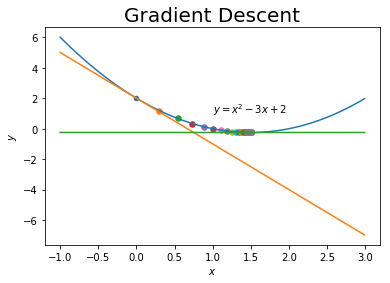

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def f_prime(x):
    return 2*x - 3


def y(x):
    return x**2 - 3*x + 2

# init parameter, domain
x = np.arange(-1.0, 3.0, 0.01)
gamma = 0.1         # learning rate
eps = 0.0001        # epsilon
tangent_eq = -3 * x + 2

# figure init
plt.title('Gradient Descent', fontsize=20)
plt.text(1, 1, r'$y=x^2 -3x + 2$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# start plot
plt.plot(x, y(x))
x0, y0 = 0, 2
plt.scatter(x0, y0, s=20)
plt.plot(x, tangent_eq)

# basic gradient descent algorithm
x_old = -1  # No meaning, for loop condition
x_new = 0   # initial value
while abs(x_old - x_new) > eps:
    x_old = x_new
    x_new = x_old - gamma * f_prime(x_old)
    plt.scatter(x_new, y(x_new), s=30)

# end plot
plt.plot(x, f_prime(x_new) * (x - x_new) + y(x_new))

plt.show()

## Batch Gradient Descent

알고리즘의 한 번의 iteration을 일괄처리$^{batch}$라고 합니다. 위의 예제에서 while loop에 해당하는 부분입니다. 이처럼 머신 러닝에서 대부분의 gradient descent 형태가 Batch gradient descent입니다.

## Stochastic Gradient Descent

데이터 셋이 매우 클 경우에는, neural network를 예로 들면 입력 변수의 개수가 엄청나게 많아서 느리게 동작할 수 있습니다. 심지어 각각 인스턴스에 대해 한번의 iteration을 거치는데 인스턴스가 수백만개일 경우 매우 느리게 동작합니다.

여기서 stochastic gradient descent라는 변형을 사용하는데, 계수의 업데이트가 각 batch의 끝이 아닌 하나의 인스턴스의 결과가 각 트레이닝 인스턴스에 대해 업데이트를 수행합니다.

## Tips for Gradient Descent

- **Plot Cost vs Time**: 각 반복 알고리즘에 의해 계산된 비용 값을 수집하고 plot합니다.잘 실행되는 Gradient descent는 각 이터레이션마다 비용이 감소한다는 것입니다. 그렇지 않으면 학습 속도를 줄여보십시오.

- **Learning Rate**: 0.1, 0.001, 0.0001 같은 실수 값입니다. 문제에 대해 각기 다른 값을 시도하고 어떤 것이 가장 잘 작동하는지 확인하십시오.

- **Rescale Inputs**: 비용 함수의 모양이 삐뚤어지거나 왜곡되지 않으면 알고리즘은 최소 비용에 더 빨리 도달합니다. 모든 입력 변수 X를 동일한 범위 (0, 1)로 재조정하여 이 작업을 수행할 수 있습니다.

- **Few Passes**: 확률론적$^{stochastic}$ gradient descent는 종종 좋은 계수로 수렴하기 위해 훈련 데이터 셋을 통해 1:10 이상 통과를 필요로 하지 않습니다.

- **Plot Mean Cost**: 각 트레이닝 데이터 셋 인스턴스에 대한 업데이트로 인해 시간이 지남에 따라 노이즈 plot이 생길 수 있습니다. 평균 10, 100, 1000건 이상의 업데이트를 사용하면 알고리즘의 학습 추세에 대해 더 잘 이해할 수 있습니다.

## Linear Regression Learning the Model

### Simple Linear Regression

평균, 표준편차 상관관계 및 공분산과 같은 데이터로부터 계산하는 회귀 분석입니다.

### Ordinary Least Squares

하나 이상의 입력이 있을 때 계수의 값을 추정하기 위해 Ordinary Least Square을 사용할 수 있습니다.
residual들의 제곱의 합을 최소화하고자 합니다. 즉 데이터를 통해 regression line이 주어지면 각 데이터 점에서 line까지의 거리를 계산하고 이를 제곱하여 모든 제곱 오류를 합산합니다.
이 접근은 데이터를 행렬로 취급하고 선형대수 연산을 사용하여 계수의 최적 값을 추정합니다.
즉 모든 데이터를 사용할 수 있어야 하고 데이터를 저장하고 행렬 작업을 수행할 수 있는 메모리가 있어야 합니다.

## Gradient Descent

하나 이상의 입력이 있는 경우 트레이닝 데이터에서 모델의 오류를 반복적으로 최소화하여 계수의 값을 최적화하는 프로세스를 사용할 수 있습니다.
이 작업을 Gradient Descent라고 하며 각 계수에 대해 0으로 시작하여 동작합니다.

### Regularized Linear Regression

- Lasso Regression: where Ordinary Least Squares is modified to also minimize the absolute sum of the coefficients(called L1 regularization).

- Ridge Regression: where Ordinary Least Squares is modified to also minimize the squared absolute sum of coefficients(called L2 regularization).

## Making Predictions with Linear Regression

ex) 키 $x$에서 체중 $y$를 예측한다.

$$ y = B_0 + B_1 * X_1 \\
weight = B_0 + B_1 * height $$

좋은 계수 집합을 찾기 위해 학습 기법을 사용합니다. 일단 발견되면 무게를 예측하기 위해 다른 키 값을 연결할 수 있습니다. 예로 $B_0 = 0.1$, $B_1 = 0.5$를 사용합니다. 그리고 182cm 키의 사람을 계산해 봅니다.

$$ weight = 0.1 + 0.5 * 182 \\
weight = 91.1$$

## Preparing Data for Linear Regression

- **Linear Assumption.** 선형 회귀는 입력 출력간의 관계를 선형이라고 가정합니다. 그 외 다른 것은 지원하지 않습니다. 관계를 선형으로 만들기 위해 데이터를 변환해야 하는 경우도 있습니다.(지수 관계인 경우 로그 변환)
- **Remove Noise.** 선형 회귀는 입력 변수와 출력 변수가 노이즈가 없다고 가정합니다.
데이터에서 신호를 더 잘 보여주고 명확하게 정리할 수 있는 데이터 정리 작업을 고려합니다.
특히 출력 변수에서 가장 중요하며 가능한 경우 특이값을 제거하기도 합니다.

- **Remove Collinearity.** 선형 회귀는 상관관계가 높은 입력 변수가 있을 때 데이터의 over-fit이 일어날 수 있습니다. 입력 데이터에 대해 상관 관계를 계산하고 가장 높은 상관관계를 가진 데이터 쌍은 제거하는 것이 좋습니다.

- **Gaussian Distributions.** 선형 회귀는 입력 출력 변수가 가우스 분포(정규 분포)를 갖는 경우보다 안정적인 예측을 합니다. 변수에 대한 변형(log, BoxCox)을 사용하면 더 많은 가우스 분포를 만들 수 있습니다.

- **Rescale Inputs** 선형 회귀는 표준화 또는 정규화를 사용하여 입력 변수의 크기를 조정할 때 종종 안정적인 예측을 합니다.

## Simple Linear Regression

단일 입력 속성 x로 선형 회귀를 사용하려는 경우 simple linear regression이라고 합니다.
간단한 선형회귀 모델은 다음과 같습니다.

$$ y = B_0 + B_1 * x $$

$x$, $y$ 는 입력 및 출력 변수이며 $B_0$ (절편), $B_1$ (기울기)은 직선을 이동시킬 수 있는 계수입니다.

Linear Regression의 아이디어는 평균으로 예측하는 것입니다. 평균값을 지나는 직선의 방정식으로부터 출발합니다.

$$ y - mean(y) = B_1(x - mean(x)) $$

주 목표는 $x$에서 $y$를 예측할 때 오류를 최소화 하기 위한 계수를 추정하는 것입니다.
양 변에 $x - mean(x)$를 곱한 다음 현재 분포되어 있는 데이터를 모두 합산하여 $B_1$에 대한 값을 다음과 같이 추정합니다.

$$ B_1 = \frac{\sum_{i=1}^{n}(x_i - mean(x)) * (y_i - mean(y))}
{\sum_{i=1}^{n}(x_i - mean(x))^{2}} $$

$B_0$는 위에서 나열한 식을 연립하여 구할 수 있습니다.

$$B_0 = mean(y) - B_1*mean(x)$$

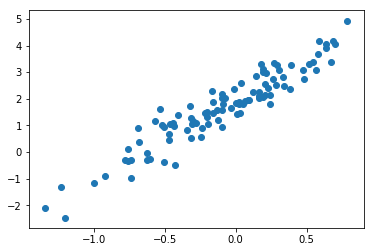

In [27]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def y(x):
    return 3*x + 2

num_points = 100
df = pd.DataFrame(columns=('x', 'y'))

for i in range(num_points):
    x_i = np.random.normal(0.0, 0.5)
    y_i = y(x_i) + np.random.normal(0.0, 0.5)
    df.loc[i] = [x_i, y_i]

# df.plot.scatter(x='x', y='y', s=20)
plt.scatter(df['x'].values, df['y'].values, marker='o')
plt.show()

위 코드는 $y = 3x + 2$ 에 약간의 정규 분포 편차를 두어 완전히 일치하지는 않는 데이터의 분포를 나타냈으며 우리가 먼저 답을 알고 있을 뿐 실제 선형회귀로 구한 값은 아닙니다. 그러면 이제 앞서 도출한 식을 대입하여 실제 답과 비교해 보겠습니다.

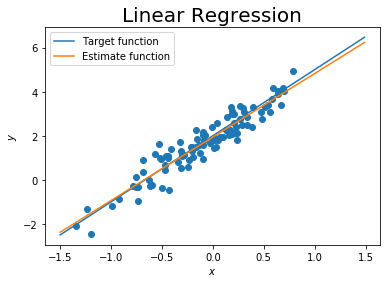

y'= 2.880713451081035x + 1.9423399532017154
y = 3x + 2


In [35]:
%matplotlib inline

mean_y = df['y'].mean()
mean_x = df['x'].mean()

df['x-mean(x)'] = df['x'] - mean_x
df['y-mean(y)'] = df['y'] - mean_y

B_1 = ((df['x-mean(x)'] * df['y-mean(y)']).sum()) / (df['x-mean(x)']**2).sum() 
B_0 = mean_y - B_1 * mean_x

x = np.arange(-1.5, 1.5, 0.01)

# figure init
plt.title('Linear Regression', fontsize=20)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# start plot
plt.scatter(df['x'].values, df['y'].values, marker='o')
plt.plot(x, y(x), label='Target function')
plt.plot(x, B_1 * x + B_0, label='Estimate function')

plt.legend()
plt.show()

print("y'= {}x + {}".format(B_1, B_0))
print("y = 3x + 2")

## Estimation Error

에러 값의 제곱의 평균을 제곱근한 Root Mean Squared Error(RMSE)를 구하여 에러를 산정할 수 있습니다.

$$ RMSE = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}^{real} - y_i)^2}{n}} $$

위에서 계산한 선형회귀방정식의 에러를 계산합니다.

In [44]:
import math

def y_prime(x):
    return B_1*x + B_0

df["y'"] = y_prime(df['x'])

RMSE = math.sqrt(((df["y'"] - df['y'])**2).mean())

print(RMSE)

0.4577287871401964


실제로 좌표평면 상의 두 점사이의 거리 제곱의 평균과 직선 사이의 거리를 나타내므로 **예측 값이 평균에서 0.457 정도 벗어났다**라고도 합니다.

## Pearson Correlation Coefficient

이전의 선형 회귀 계수 $ B_1 = \frac{\sum_{i=1}^{n}(x_i - mean(x)) * (y_i - mean(y))}
{\sum_{i=1}^{n}(x_i - mean(x))^{2}} $ 을 통계학에서 분모는 $X$의 *분산$^{variance}$*을 나타내고 분자는 $X$, $Y$의 *공분산$^{covariance}$*을 나타냅니다. 따라서 다음과 같이 쓸 수 있습니다.

$$ B_1 = \frac{Cov(x,y)}{Var^2(x)} $$

분산의 제곱근이 표준편차$^{standard deviation}$ 이므로 $stdev^2(X) = Var(X)$가 성립하여 다음과 같이 식을 변형할 수 있습니다.

$$ B_1 = \frac{Cov(x,y)}{stdev(x)*stdev(y)} * \frac{stdev(y)}{stdev(x)} $$

여기서 $\rho = \frac{Cov(x,y)}{stdev(x)*stdev(y)}$ 를 **Pearson 상관 계수**라고 하며 상관관계를 나타내는 척도로 사용되기도 합니다.

따라서 선형회귀 방정식의 기울기는 평균으로부터의 표준편차에 상관 계수를 곱한 기울기라 할 수 있습니다.

## Limitation

실제로 100개의 정해진 표본에 대한 가정으로 출발하였기 때문에 회귀 방정식을 산출함으로써 이미 일반화가 이루어 졌고 학습이 끝난 것입니다.
새로운 데이터에 대해서는 학습된 직선에 대입함으로써 더 이상의 계수 업데이트는 이루어지지 않습니다.
데이터가 늘어날 수록 계수를 업데이트 하려면 Gradient Descent 알고리즘을 도입하는 방법이 있습니다.

## Linear Regression Using Gradient Descent

Stochastic Gradient Descent 알고리즘으로 트레이닝 인스턴스 하나에 대한 예측을 하고, 오류가 계산되며 다음 예측에 대한 오류를 줄이기 위해 모델의 계수를 업데이트 합니다. 계수는 앞서 소개한 Gradient Descent 공식으로 계산합니다.

$$ \omega := \omega - \gamma * \nabla Q(\omega_i) ~~~ for~ i \in instance $$

여기서 $\omega$ 는 최적화된 계수이며, $\gamma$는 지정된 학습율(ex 0.1)을 나타내고 $Q(\omega)$는 계수에 영향을 주는 트레이닝 데이터 모델에 대한 에러함수입니다.

일반적으로 Least Squares 함수를 많이 사용하지만 상관관계를 설정하는 기준에 따라 다를 수 있습니다.
에러 함수 역시 인스턴스를 어떻게 설정하느냐에 따라 다를 수 있습니다.

정리하자면, 선형 회귀 방정식의 예측 결과는 $y = B_0 + B_1 * x$이므로 $\omega = \left\lgroup \matrix{B_0 \cr B_1} \right\rgroup$ 라고 하고 하나의 인스턴스를 설정하여 다음과 같은 식을 이끌어낼 수 있습니다.

$$ Q(\omega) = \sum_{i \in instance} Q_i(\omega) = \sum_{i \in instance} (B_0 + B_1 * x_i - y_{i}^{real})^2$$

$$ \nabla Q_i(\omega) = \left\lgroup \matrix{2 * (B_0 + B_1 * x_i - y_{i}^{real}) \cr 2 * x_i * (B_0 + B_1 * x_i - y_{i}^{real}) } \right\rgroup$$

각 계수는 서로 독립적이므로 각 계수에 대한 편미분을 수행합니다.
인스턴스 내부의 표본에 대한 일괄계산$^{minibatch}$만 수행하고 이를 일반화합니다.

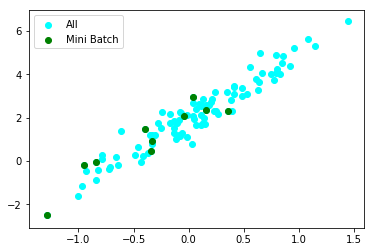

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def y(x):
    return 3*x + 2

num_points = 100
df = pd.DataFrame(columns=('x', 'y'))
mini_df = df.copy()

for i in range(num_points):
    x_i = np.random.normal(0.0, 0.5)
    y_i = y(x_i) + np.random.normal(0.0, 0.5)
    
    # mini batch instance 10% data
    if i%10 == 0:
        mini_df.loc[i] = [x_i, y_i]
        df.loc[i] = [x_i, y_i]
    else:
        df.loc[i] = [x_i, y_i]

# df.plot.scatter(x='x', y='y', s=20)
plt.scatter(df['x'].values, df['y'].values, color='cyan', label='All')
plt.scatter(mini_df['x'].values, mini_df['y'].values, color='green', label='Mini Batch')
plt.legend()
plt.show()

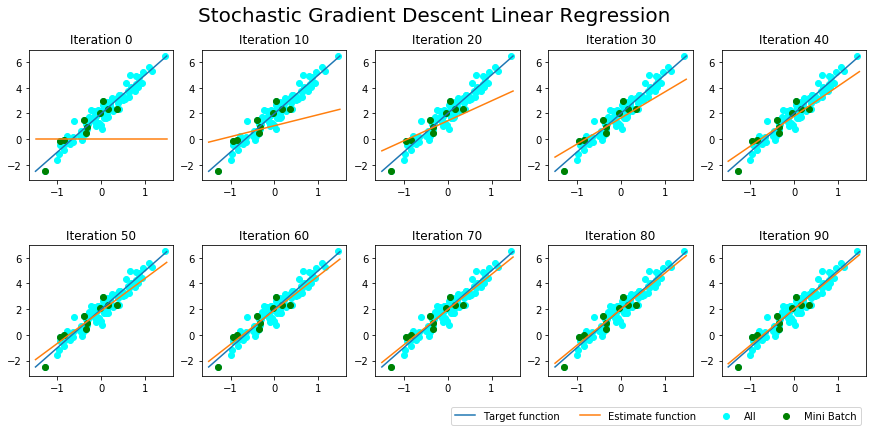

In [49]:
def base_plot(subplot):
    # start plot
    subplot.scatter(df['x'].values, df['y'].values, color='cyan', label='All')
    subplot.scatter(mini_df['x'].values, mini_df['y'].values, color='green', label='Mini Batch')

# initial value for gradient descent
gamma = 0.01
B_0 = 0.0
B_1 = 0.0
iteration = 100
df_err = pd.Series(name=('iter_err'))
    
x = np.arange(-1.5, 1.5, 0.01)

# figure init
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Stochastic Gradient Descent Linear Regression', fontsize=20)
fig.subplots_adjust(hspace = .5, wspace=.2)

axs = axs.ravel()

for i in range(iteration):
    if i%10 == 0:
        j = int(i/10)
        base_plot(axs[j])
        axs[j].set_title('Iteration {}'.format(i))
        axs[j].plot(x, y(x), label='Target function')
        axs[j].plot(x, B_1 * x + B_0, label='Estimate function')
    
    for x_i, y_i in mini_df[['x', 'y']].values:
        Q_B0 = (2 * (B_0 + B_1 * x_i - y_i))
        Q_B1 = (2 * x_i * (B_0 + B_1 * x_i - y_i))
        B_0, B_1 = B_0 - gamma*Q_B0, B_1 - gamma*Q_B1
        
    df_err.loc[i] = ((B_0 + B_1 * mini_df['x'] - mini_df['y'])**2).mean()

axs[-1].legend(bbox_to_anchor=(1, -0.2), ncol=4)
plt.show()

학습 결과가 뚜렷하게 나타나기 시작합니다. 코드 중간에 미분하기 전의 에러 함수를 한 번의 이터레이션 결과마다 비교하여 아래와 같이 그래프로도 나타내어 보았습니다. 60회 정도 이터레이션을 거치면서 에러가 눈에 띄게 작아지는 것을 확인할 수 있습니다.

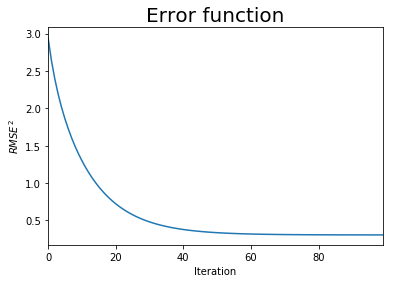

In [53]:
plt.title('Error function', fontsize=20)
plt.xlabel('Iteration')
plt.ylabel('$RMSE^2$')

df_err.plot()
plt.show()

## Logistic Function

*Sigmoid* 함수라고도 불리는 로지스틱 함수는 통계학자가 생태계의 인구 증가 특성을 설명하고 환경 수용 능력을 극대화하고 빠르게 일으키기 위해 개발되었습니다. S자 모양의 곡선은 어떤 $x$값이라도 결과가 0과 1사이의 값에서 벗어나지 않습니다.

$$ y = \frac{1}{1 + e^{-x}} $$

$e$는 자연로그의 상수이며 아래와 같은 그래프 양상으로 나타납니다.

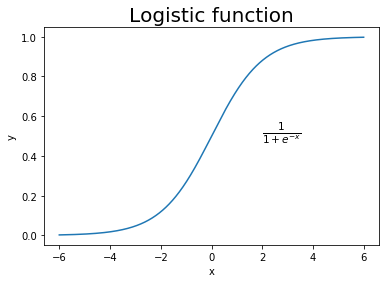

In [63]:
def y(x):
    return 1 / (1 + np.e**(-x))

plt.title('Logistic function', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')

x = np.arange(-6, 6, 0.01)
plt.text(2, 0.5, r'$\frac{1}{1+e^{-x}}$', fontsize=15)
plt.plot(x, y(x))
plt.show()

## Logistic Regression

정의 한 식 $y=\frac{1}{1 + e^{-x}}$ 의 분모 분자를 $e^{-x}$로 나누면 다음 식이 도출됩니다.

$$ \frac{1}{1 + e^{-x}} = \frac{e^x}{e^x + 1} $$

Logistic 회귀 분석은 입력 값 $x$에 선형으로 가중치 계수를 주어 출력을 예측하는 것입니다.
Linear 회귀 분석과의 주된 차이점은 모델링 된 출력값이 숫자 값이 아닌 이진(0, 1)값이라는 것입니다.
주로 0과 1 사이 값을 소수 첫째 자리에서 반올림 하여 결정합니다.

$$ y = \frac{e^{B_0 + B_1 * x}}{1 + e^{B_0 + B_1 * x}} $$

여기서 $y$가 예측된 값이며 데이터의 분포와 관계에 대한 가정은 선형 회귀에서 가정한 것과 거의 같습니다.

## Prepare Data for Logistic Regression

기계학습 프로젝트에서 결과를 해석하는 것 보다는 정확한 예측을 하는 데 중점을 둡니다.
따라서 모델이 견고하고 잘 작동하기 위해 몇가지 가정이 무시될 수 있습니다.
정확한 예측을 위해 데이터를 준비하고, 여러번의 실험을 거쳐야 합니다.

- **Binary Output Variable**: 로지스틱 회귀 문제는 주로 두 클래스로 분류(classification)하는 문제를 위한 것입니다. 0, 또는 1로 채울 수 있는 클래스에 속하는 인스턴스의 확률을 예측합니다.

- **Remove Noise**: 출력 변수 $y$에 오류가 없다고 가정하고, 아웃라이어나 잘못 분류된 인스턴스를 제거하는 것을 고려하는 것이 좋습니다.

- **Gaussian Distribution**: 로지스틱 회귀는 선형 알고리즘입니다(출력 변수의 비선형 변환 포함). 입력 변수와 출력 변수 간의 선형 관계를 가정합니다. 따라서 $log$, $root$, $Box-Cox$ 등의 변환을 사용하여 입력 변수가 선형 관계가 잘 드러나도록 데이터를 변환하면 보다 정확한 모델을 생성할 수 있습니다.

- **Remove Correlated Inputs**: 선형 회귀와 마찬가지로 너무 높은 상관관계를 가진 입력 변수가 많을 경우 *overfitting* 현상이 일어날 수 있습니다. 모든 입력 쌍들의 상관 관계를 계산하고 지나친 상관 관계를 가진 입력 변수를 제거하는 것을 고려합니다.

- **Fail to Converge**: 계수가 수렴하지 못하는 것을 학습하는 우도 측정(likelihood estimation) 프로세스를 예상할 수 있습니다. 이는 데이터가 매우 *sparse*(데이터에 0이 많음) 하거나 연관성이 높은 입력값이 많을 경우 발생할 수 있습니다.

## Tutorial Dataset


        X_1       X_2  Y
0  2.781084  2.550537  0
1  1.465489  2.362125  0
2  3.396562  4.400294  0
3  1.388070  1.850220  0
4  3.064072  3.005306  0
5  7.627531  2.759262  1
6  5.332441  2.088627  1
7  6.922597  1.771064  1
8  8.675419 -0.242069  1
9  7.673756  3.508563  1


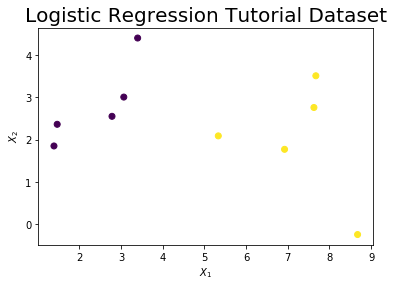

In [90]:
%matplotlib inline
from io import StringIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = '''\
X_1 X_2 Y
2.7810836 2.550537003 0
1.465489372 2.362125076 0
3.396561688 4.400293529 0
1.38807019 1.850220317 0
3.06407232 3.005305973 0
7.627531214 2.759262235 1
5.332441248 2.088626775 1
6.922596716 1.77106367 1
8.675418651 -0.242068655 1
7.673756466 3.508563011 1
'''

df = pd.read_table(StringIO(data), sep='\s+')

print(df)

plt.title('Logistic Regression Tutorial Dataset', fontsize=20)
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')

plt.scatter(df['X_1'], df['X_2'], c=df['Y'])
plt.show()

In [92]:
B_0 = 0.0
B_1 = 0.0
B_2 = 0.0

B_0 + B_1 * df['X_1'] + B_2 * df['X_2']

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
dtype: float64